## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

In [2]:
# Import Neccessary libraries
import numpy as np
import pandas as pd

In [3]:
# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Checking the data

In [5]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
print(df.shape)
df.head()

(100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
# Count the number of distinct values in each column
number_of_distinct_values = df.nunique()

# Print the number of distinct values for each column
print(number_of_distinct_values)

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64


In [7]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the no. of duplicate rows
print(duplicate_rows.shape)

(3854, 9)


3854 duplicates.

In [8]:
df = df.drop_duplicates()

In [9]:
# Checking null values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


No missing values

In [10]:
# since gender has 3 categories
print(df.shape)
print(len(df[df['gender'] == 'Other']))

(96146, 9)
18


Since there are only 18 values of "Other", we'll remove them.

In [11]:
df = df[df['gender'] != 'Other']
df.shape

(96128, 9)

## EDA

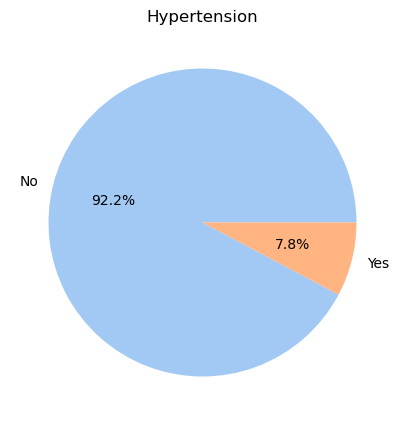

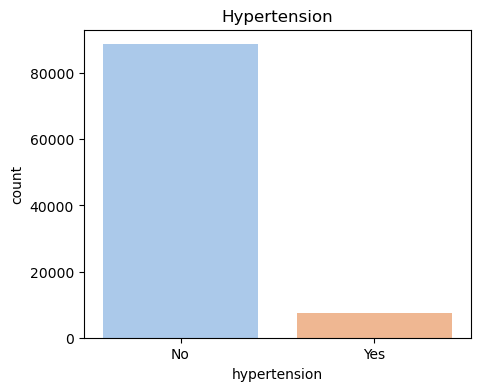

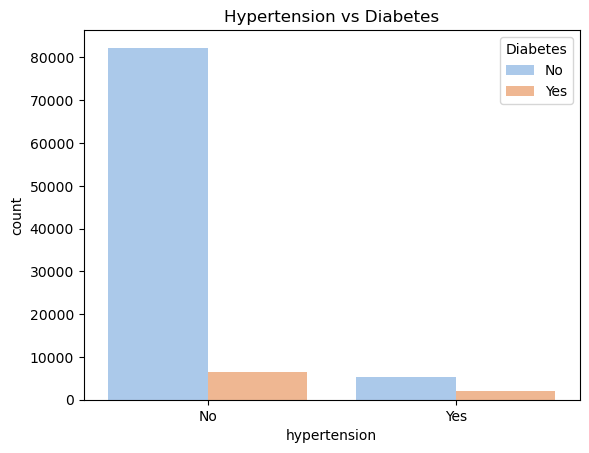

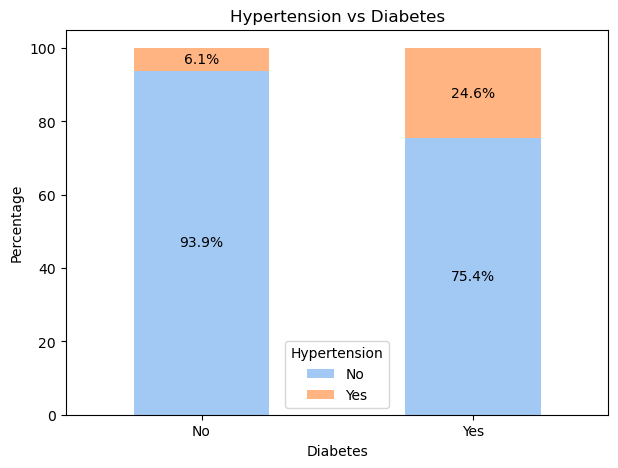

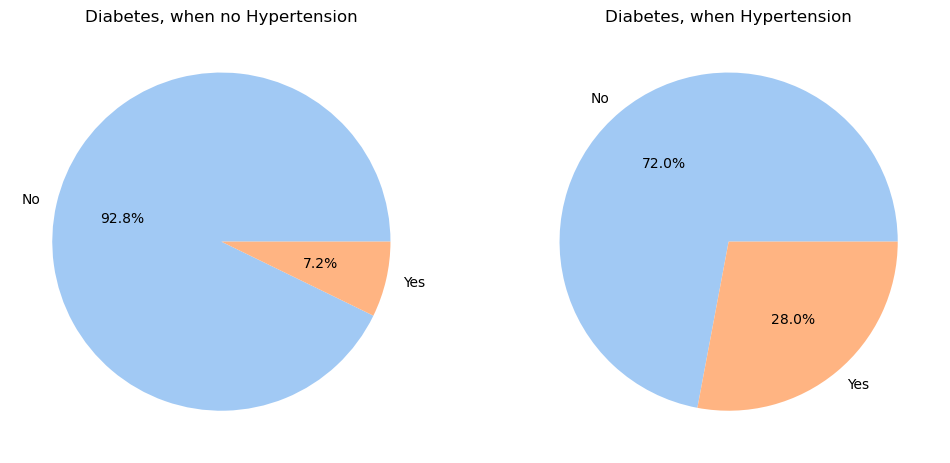

In [12]:
colors = sns.color_palette('pastel')[0:2]

# Create pie chart of the hypertension
plt.figure(figsize=(5, 5))
plt.pie(df["hypertension"].value_counts(), labels=["No", "Yes"], colors=colors, autopct='%1.1f%%')
plt.title("Hypertension")
plt.show()


# Create bar graph of the hypertension
plt.figure(figsize=(5,4))
sns.countplot(x="hypertension", data=df, palette=colors)
plt.title("Hypertension")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()


# Bar Graph of hypertension vs diabetes
sns.countplot(x='hypertension', hue='diabetes', data=df, palette=colors)
plt.title('Hypertension vs Diabetes')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.legend(title='Diabetes', labels=["No", "Yes"])
plt.show()


# Create a cross-tabulation table with diabetes and Hypertension
cross_tab = pd.crosstab(df['diabetes'], df['hypertension'], normalize='index') * 100
# Plot the 100% stacked bar chart
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(7, 5), color=colors)
plt.title('Hypertension vs Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.legend(title='Hypertension', labels=["No", "Yes"])
# Annotate the percentages on the bars
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
#
plt.show()


# Create two pie charts side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Filter the DataFrame to only include rows where hypertension is 0
df_filtered = df[df["hypertension"] == 0]
# Create pie chart of the diabetes where no hypertension is present
ax1.pie(df_filtered["diabetes"].value_counts(), labels=["No", "Yes"], colors=colors, autopct='%1.1f%%')
ax1.set_title("Diabetes, when no Hypertension")
# Filter the DataFrame to only include rows where hypertension is 1
df_filtered = df[df["hypertension"] == 1]
# Create pie chart of the diabetes where hypertension is present
ax2.pie(df_filtered["diabetes"].value_counts(), labels=["No", "Yes"], colors=colors, autopct='%1.1f%%')
ax2.set_title("Diabetes, when Hypertension")
#
plt.show()

#### comment

*Bar graph of hypertension: The bar graph shows that 92.2% of the sample does not have hypertension and 7.8% does. This means that hypertension is a relatively rare condition in the sample.

*Stacked bar graph of hypertension and diabetes: The stacked bar graph shows that 6.1% of people with diabetes also have hypertension. This means that hypertension is more common in people with diabetes than in people without diabetes.

*Pie charts of diabetes by hypertension status: The pie charts show that 7.2% of people with no hypertension have diabetes, while 28% of people with hypertension have diabetes. This means that the risk of developing diabetes is higher for people with hypertension than for people without hypertension.

In conclusion, the data suggests that there is a positive association between hypertension and diabetes. This means that people with hypertension are more likely to develop diabetes than people without hypertension.
There may be other factors that contribute to the association between hypertension and diabetes, such as age, obesity, and family history.

#### Additional

Johns Hopkins medicine -
"High blood pressure is twice as likely to strike a person with diabetes than a person without diabetes."

Link : https://www.hopkinsmedicine.org/health/conditions-and-diseases/diabetes/diabetes-and-high-blood-pressure

And also they say,
"Left untreated, high blood pressure can lead to heart disease and stroke. In fact, a person with diabetes and high blood pressure is four times as likely to develop heart disease than someone who does not have either of the conditions."

meaning that all 3 variables have a relationship.
People with diabetes are more likely to develop heart disease, especially if they also have high blood pressure.

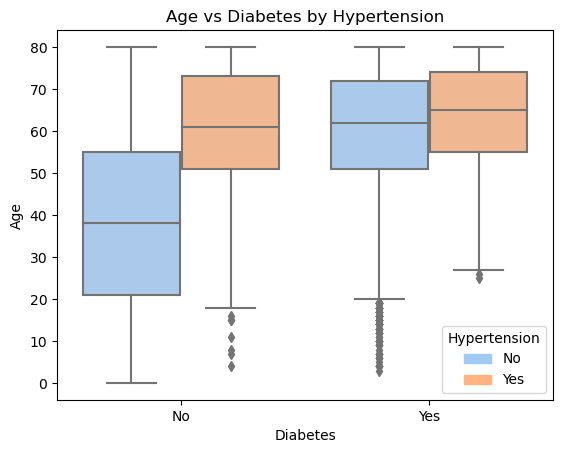

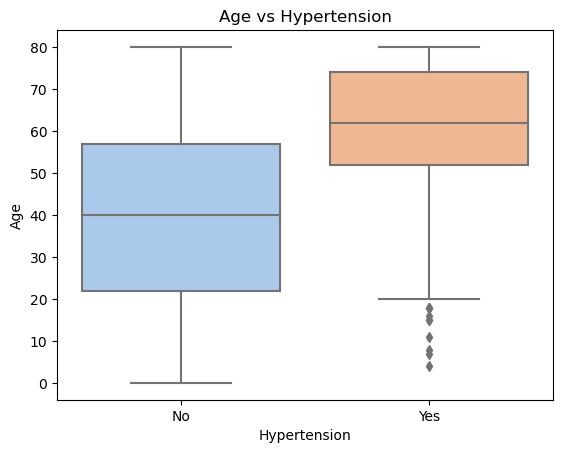

In [13]:
# 'colors' is defined as the first two colors from the 'pastel' color palette
colors = sns.color_palette('pastel')[0:2]

# Create the box plot using Seaborn
ax = sns.boxplot(x='diabetes', y='age', hue='hypertension', data=df, palette=colors)

# Customize the plot
plt.title('Age vs Diabetes by Hypertension')
plt.xlabel('Diabetes')
plt.ylabel('Age')

# Create custom legend labels with colored markers
legend_labels = ["No", "Yes"]
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels, title='Hypertension')

plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)  # Customize x-axis labels

# Show the plot
plt.show()



sns.boxplot(x='hypertension', y='age', data=df, palette=colors)
plt.title('Age vs Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.show()

Age clearly has a relationship with hypertension.

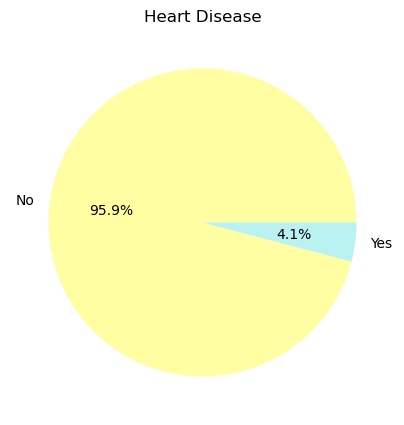

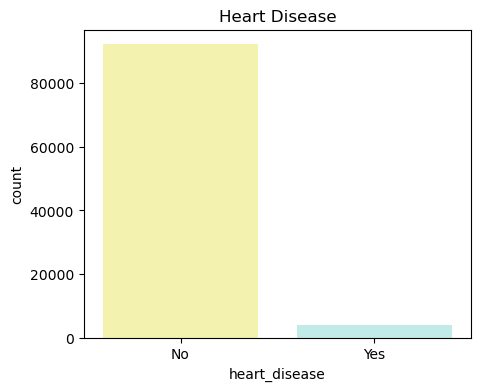

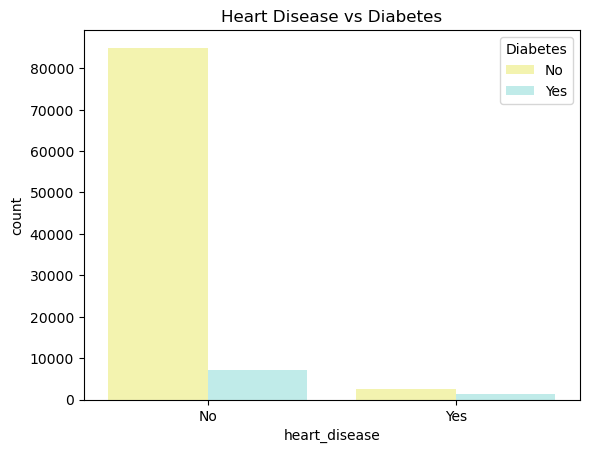

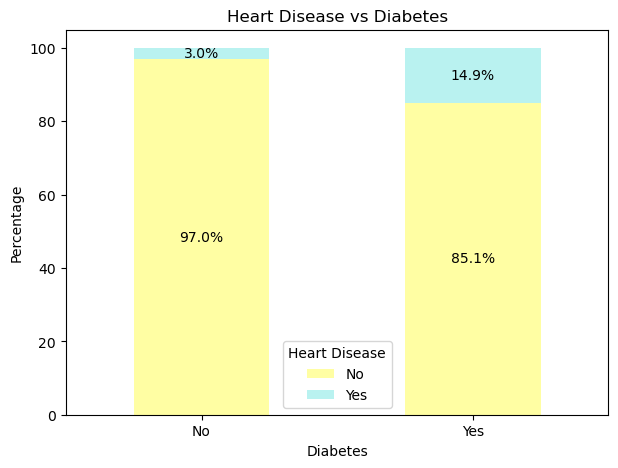

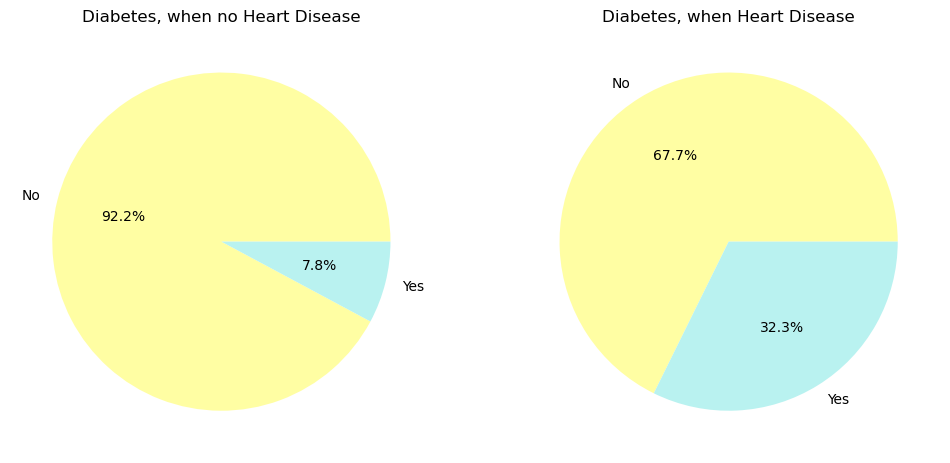

In [14]:
colors = sns.color_palette('pastel')[8:10]

# Create pie chart of the heart_disease
plt.figure(figsize=(5, 5))
plt.pie(df["heart_disease"].value_counts(), labels=["No", "Yes"], colors=colors, autopct='%1.1f%%')
plt.title("Heart Disease")
plt.show()


# Create bar graph of the heart_disease smoking_history variables
plt.figure(figsize=(5,4))
sns.countplot(x="heart_disease", data=df, palette=colors)
plt.title("Heart Disease")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()


# Bar Graph of Heart Disease vs diabetes
colors = sns.color_palette('pastel')[8:10]
sns.countplot(x='heart_disease', hue='diabetes', data=df, palette=colors)
plt.title('Heart Disease vs Diabetes')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.legend(title='Diabetes', labels=["No", "Yes"])
plt.show()


# Create a cross-tabulation table with diabetes and heart disease
cross_tab = pd.crosstab(df['diabetes'], df['heart_disease'], normalize='index') * 100
# Plot the 100% stacked bar chart
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(7, 5), color=colors)
plt.title('Heart Disease vs Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.legend(title='Heart Disease', labels=["No", "Yes"])
# Annotate the percentages on the bars
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
#
plt.show()


# Create two pie charts side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Filter the DataFrame to only include rows where Heart Disease is 0
df_filtered = df[df["heart_disease"] == 0]
# Create pie chart of the diabetes where no Heart Disease is present
ax1.pie(df_filtered["diabetes"].value_counts(), labels=["No", "Yes"], colors=colors, autopct='%1.1f%%')
ax1.set_title("Diabetes, when no Heart Disease")
# Filter the DataFrame to only include rows where Heart Disease is 1
df_filtered = df[df["heart_disease"] == 1]
# Create pie chart of the diabetes where Heart Disease is present
ax2.pie(df_filtered["diabetes"].value_counts(), labels=["No", "Yes"], colors=colors, autopct='%1.1f%%')
ax2.set_title("Diabetes, when Heart Disease")
#
plt.show()

#### comment

*Bar graph of heart disease: The bar graph shows that 95.9% of the sample does not have heart disease and 4.1% does. This means that heart disease is a relatively rare condition in the sample.

*Stacked bar graph of heart disease and diabetes: The stacked bar graph shows that 3% of people with  no diabetes also have heart disease. This means that heart disease is more common in people with diabetes than in people without diabetes.

*Pie charts of diabetes by heart disease status: The pie charts show that 7.8% of people with no heart disease have diabetes, while 32.3% of people with heart disease have diabetes. This means that the risk of developing diabetes is higher for people with heart disease than for people without heart disease.

In conclusion, the data suggests that there is a positive association between heart disease and diabetes. This means that people with heart disease are more likely to develop diabetes than people without heart disease. There may be other factors that contribute to the association between heart disease and diabetes, such as age, obesity, and family history.

National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) -
"Having diabetes means you are more likely to develop heart disease.
People with diabetes are also more likely to have certain risk factors, such as high blood pressure NIH external link or high cholesterol, that increase their chances of having a heart attack or a stroke."

link : https://www.niddk.nih.gov/health-information/diabetes/overview/preventing-problems/heart-disease-stroke

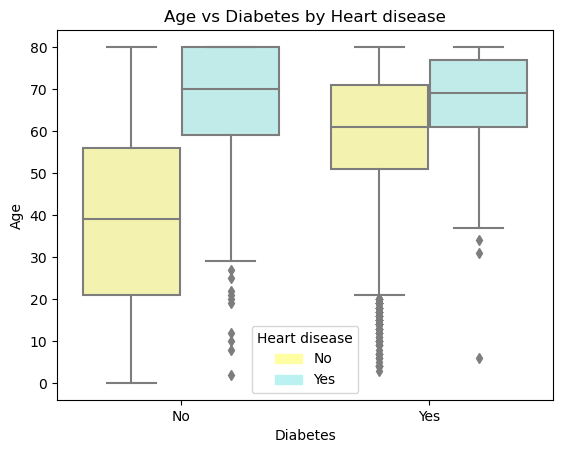

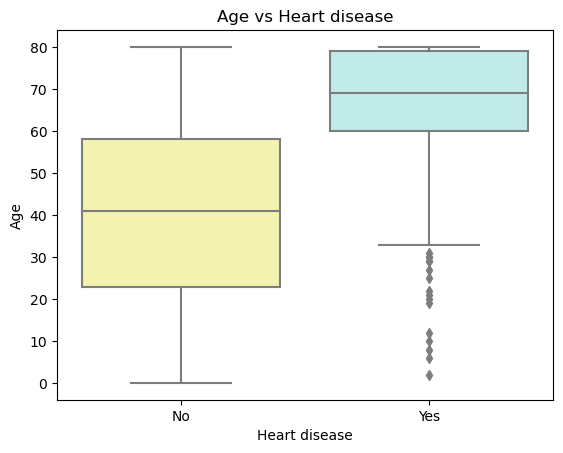

In [15]:
colors = sns.color_palette('pastel')[8:10]

sns.boxplot(x='diabetes', y='age', hue='heart_disease', data=df, palette=colors)
plt.title('Age vs Diabetes by Heart disease')
plt.xlabel('Diabetes')
plt.ylabel('Age')

# Create custom legend labels with colored markers
legend_labels = ["No", "Yes"]
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels, title='Heart disease')

plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.show()

sns.boxplot(x='heart_disease', y='age', data=df, palette=colors)
plt.title('Age vs Heart disease')
plt.xlabel('Heart disease')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.show()

Age clearly has a relationship with heart disease.

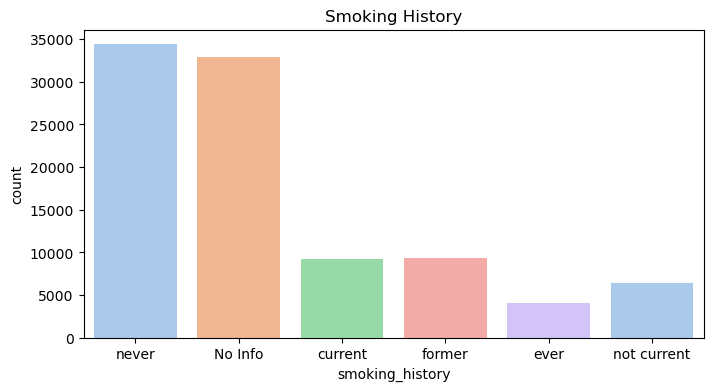

In [16]:
# Create bar graph of the smoking_history
plt.figure(figsize=(8,4))
colors = sns.color_palette('pastel')[0:5]
sns.countplot(x="smoking_history", data=df, palette=colors)
plt.title("Smoking History")
plt.show()

In [17]:
# calcutae the precent of No Info in smoking history variable
len(df[df['smoking_history'] == 'No Info'])/len(df['smoking_history'])

0.342054344207723

There is 34.2% with No Info in Smoking History variable.

In [18]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status == 'never':
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'
    else:
        return 'no info'
    
# Apply the function to the 'smoking_history' column
df['smoking_history1'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history1'].value_counts())
df.head()

non-smoker     34395
no info        32881
past_smoker    19655
current         9197
Name: smoking_history1, dtype: int64


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history1
0,Female,80.0,0,1,never,25.19,6.6,140,0,non-smoker
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,no info
2,Male,28.0,0,0,never,27.32,5.7,158,0,non-smoker
3,Female,36.0,0,0,current,23.45,5.0,155,0,current
4,Male,76.0,1,1,current,20.14,4.8,155,0,current


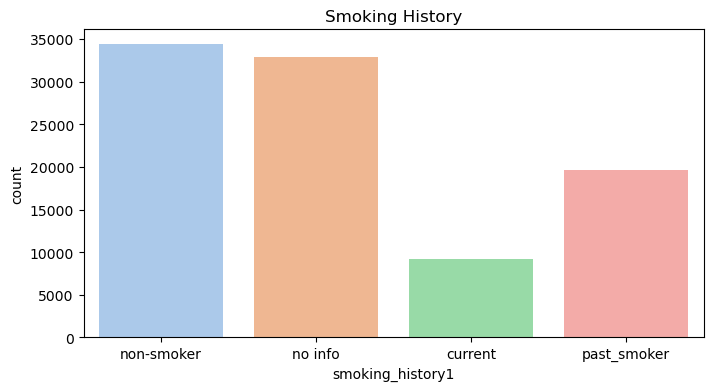

In [19]:
# Create bar graph of the smoking_history
plt.figure(figsize=(8,4))
colors = sns.color_palette('pastel')[0:5]
sns.countplot(x="smoking_history1", data=df, palette=colors)
plt.title("Smoking History")
plt.show()

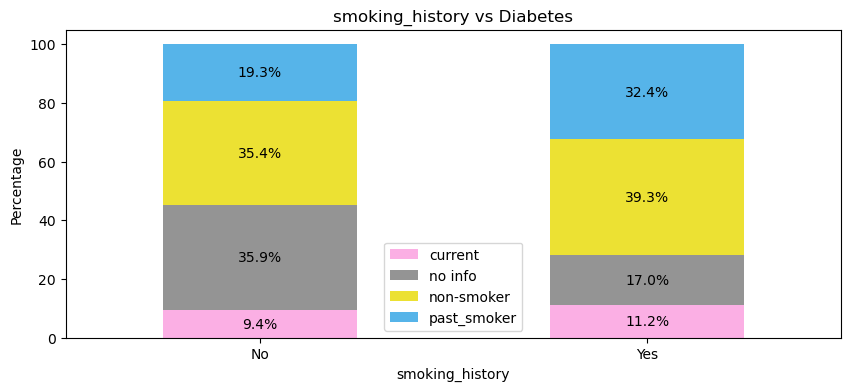

In [20]:
# Create a cross-tabulation table with diabetes and Smoking
cross_tab = pd.crosstab(df['diabetes'], df['smoking_history1'], normalize='index') * 100

colors = sns.color_palette('colorblind')[6:10]  # Define the colors for "No" and "Yes" categories

# Plot the 100% stacked bar chart
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 4), color=colors)
plt.title('smoking_history vs Diabetes')
plt.xlabel('smoking_history')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.legend()

# Annotate the percentages on the bars
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

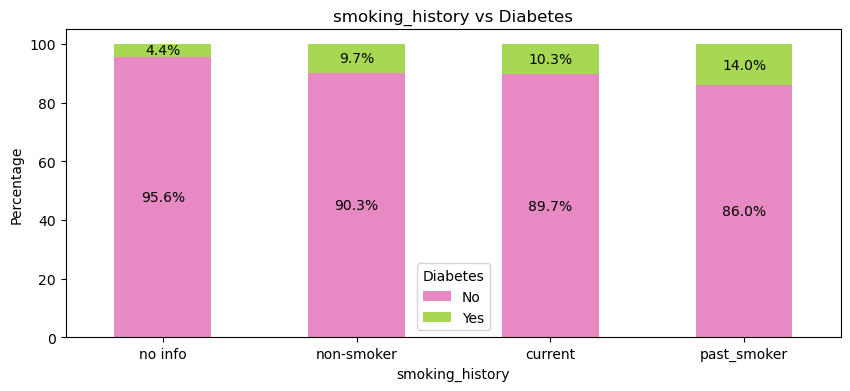

In [21]:
# Define the desired order of categories for 'age_dist'
order = ['no info', 'non-smoker','current','past_smoker']

# Convert 'age_dist' to a Categorical data type with the specified order
df['smoking_history1'] = pd.Categorical(df['smoking_history1'], categories=order, ordered=True)

# Create a cross-tabulation table with diabetes and Smoking
cross_tab = pd.crosstab(df['smoking_history1'], df['diabetes'], normalize='index') * 100

colors = sns.color_palette('Set2')[3:10]
# Plot the 100% stacked bar chart
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 4), color=colors)
plt.title('smoking_history vs Diabetes')
plt.xlabel('smoking_history')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(labels=["No", "Yes"],title="Diabetes")

# Annotate the percentages on the bars
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

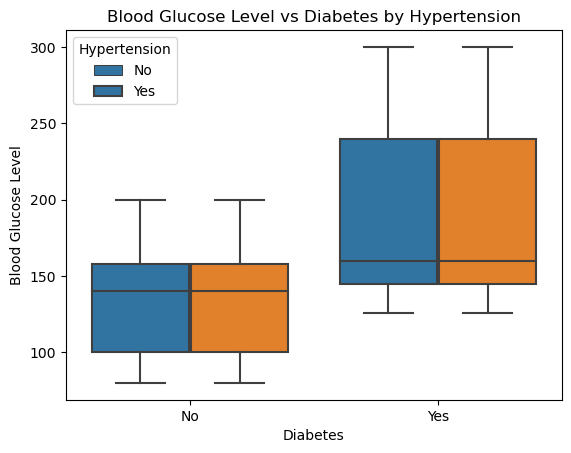

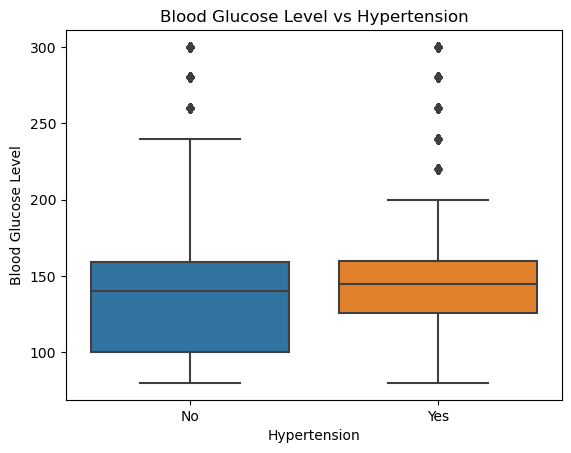

In [22]:
sns.boxplot(x='diabetes', y='blood_glucose_level', hue='hypertension', data=df)
plt.title('Blood Glucose Level vs Diabetes by Hypertension')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.legend(title='Hypertension', labels=["No", "Yes"])
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.show()

sns.boxplot(x='hypertension', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Blood Glucose Level')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.show()

#### comment

In the box plot comparing blood_glucose_level and diabetes, a clear distinction in the distribution of blood glucose levels is observed between individuals with and without diabetes. The median, quartile, and outlier patterns reveal that individuals with diabetes tend to have higher blood glucose levels compared to those without diabetes.
Upon dividing the box plot by hypertension, it becomes evident that the presence or absence of hypertension does not significantly alter the relationship between blood glucose levels and diabetes.Although there might be variations in blood glucose levels between individuals with diabetes and hypertension, as well as those with diabetes but without hypertension, these differences are relatively minor within each group.

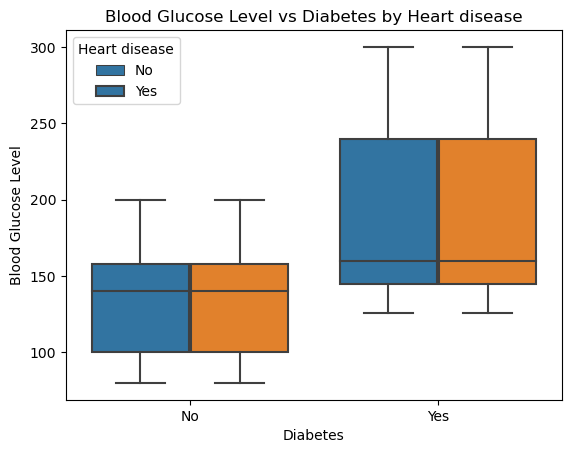

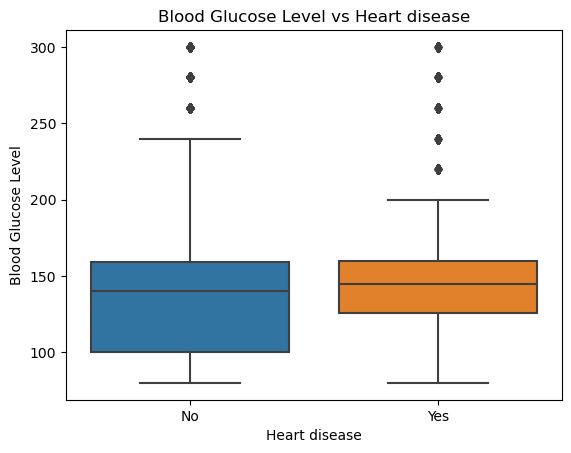

In [23]:
sns.boxplot(x='diabetes', y='blood_glucose_level', hue='heart_disease', data=df)
plt.title('Blood Glucose Level vs Diabetes by Heart disease')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.legend(title='Heart disease', labels=["No", "Yes"])
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.show()

sns.boxplot(x='heart_disease', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Heart disease')
plt.xlabel('Heart disease')
plt.ylabel('Blood Glucose Level')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.show()

#### comment

In the box plot comparing blood_glucose_level and diabetes, a noticeable distinction in the distribution of blood glucose levels exists between individuals with and without diabetes. As evident from the median, quartile, and outlier patterns, individuals with diabetes tend to exhibit higher blood glucose levels compared to those without diabetes.
When dividing the box plot by the heart_disease variable, similar to the case with hypertension, it becomes apparent that the presence or absence of heart disease does not substantially alter the relationship between blood glucose levels and diabetes.
Although there may be variations in blood glucose levels among individuals with diabetes and heart disease, as well as those with diabetes but without heart disease, these differences remain relatively minor within each group.